# IMPORT DATA SET AND PREPROCESSING

In [2]:
###1. Load Data and Splot Data
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

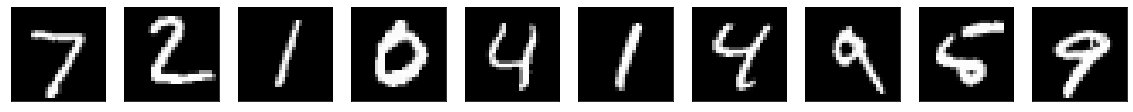

In [3]:
#preprocessing
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [4]:
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)
New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


In [5]:
#Setting up parameters
input_size = 784
batch_size = 200   
hidden1 = 400
hidden2 = 20
epochs = 2

# Recognition Through Fully Covulutional Network Model.

In [6]:
#Building FCN Model
###4.Build the model
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                8020      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Training the model
# Fitting on Data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=10, verbose=2)
###5.Test 

Epoch 1/10
300/300 - 5s - loss: 1.5074 - accuracy: 0.6038
Epoch 2/10
300/300 - 2s - loss: 0.7047 - accuracy: 0.8234
Epoch 3/10
300/300 - 2s - loss: 0.5072 - accuracy: 0.8679
Epoch 4/10
300/300 - 2s - loss: 0.4235 - accuracy: 0.8858
Epoch 5/10
300/300 - 2s - loss: 0.3772 - accuracy: 0.8948
Epoch 6/10
300/300 - 2s - loss: 0.3470 - accuracy: 0.9022
Epoch 7/10
300/300 - 2s - loss: 0.3251 - accuracy: 0.9081
Epoch 8/10
300/300 - 2s - loss: 0.3076 - accuracy: 0.9123
Epoch 9/10
300/300 - 2s - loss: 0.2931 - accuracy: 0.9164
Epoch 10/10
300/300 - 2s - loss: 0.2807 - accuracy: 0.9197


313/313 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.9228

Test accuracy: 0.9228000044822693
[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


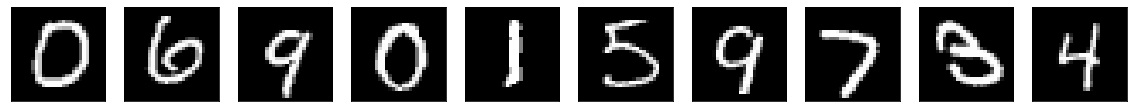

INFO:tensorflow:Assets written to: C:\Users\Admin\Downloads\FCNN\assets


In [8]:
#Testing the model
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(10,20)
X_valid = X_test[mask]
y_pred = (model.predict(X_valid) > 0.5).astype("int32")
print(y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()
model.save('C:\\Users\\Admin\\Downloads\\FCNN')

# Recognition Through Convulational Neural Network Model.

In [9]:
#CNN
#Prepare the data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
#Build Model CNN
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [11]:
#Train Model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 47s 108ms/step - loss: 0.3708 - accuracy: 0.8879 - val_loss: 0.0784 - val_accuracy: 0.9795
Epoch 2/15
422/422 [==============================] - 51s 121ms/step - loss: 0.1084 - accuracy: 0.9675 - val_loss: 0.0563 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 47s 112ms/step - loss: 0.0816 - accuracy: 0.9748 - val_loss: 0.0443 - val_accuracy: 0.9890
Epoch 4/15
422/422 [==============================] - 55s 130ms/step - loss: 0.0697 - accuracy: 0.9782 - val_loss: 0.0409 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 50s 118ms/step - loss: 0.0617 - accuracy: 0.9809 - val_loss: 0.0413 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 46s 110ms/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0379 - val_accuracy: 0.9888
Epoch 7/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.0371 - val_ac

In [12]:
#Test model -Evaluate
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025686144828796387
Test accuracy: 0.9912999868392944


In [13]:
model.save('C:\\Users\\Admin\\Downloads\\CNN')

INFO:tensorflow:Assets written to: C:\Users\Admin\Downloads\CNN\assets


# Testing models through GUI Application

In [17]:
#GUI 
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
model = load_model('C:\\Users\\Admin\\Downloads\\CNN')
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()